In [1]:
#import json 

#with open('/home/sante/Documents/FGV/Eclass/Data Visualization/final-project-security-urban-perception-tracking/public/image_safety.json', 'r') as file:
#    data = json.load(file)

#len(data)

In [2]:
import pandas as pd


In [3]:
ids = pd.read_excel('ids_listado.xlsx')
ids

,Contador,ID
0,1,50f5ea5bfdc9f065f0007ab6
1,2,50f5ea5bfdc9f065f0007ab9
2,3,50f5ea5cfdc9f065f0007abf
3,4,50f5ea5cfdc9f065f0007ac5
4,5,50f5ea5dfdc9f065f0007ada
...,...,...
145,146,50f5ec17fdc9f065f0008708
146,147,50f5ec18fdc9f065f0008719
147,148,50f5ec1ffdc9f065f00087a4
148,149,50f5ec37fdc9f065f0008802


In [4]:
scores = pd.read_csv("summary_qscores.csv", sep=";")
scores

,image_id,lat,long,city,country,continent,safety,beautiful,wealthy,lively,boring,depressing
0,50e5f7d4d7c3df413b00056a,22.310524,114.170637,Hong Kong,China,Asia,4.135536,1.574074,2.962963,4.199346,5.000000,0.000000
1,50e5f7d4d7c3df413b00056b,22.274799,114.192828,Hong Kong,China,Asia,3.560981,2.229437,5.277778,5.662393,7.777778,3.333333
2,50e5f7d4d7c3df413b00056c,22.291117,114.147373,Hong Kong,China,Asia,4.514946,3.333333,3.333333,4.746693,3.611111,0.000000
3,50e5f7d4d7c3df413b00056d,22.314273,114.177176,Hong Kong,China,Asia,4.852448,3.333333,5.083333,3.333333,8.333333,3.327381
4,50e5f7d4d7c3df413b00056e,22.332412,114.204790,Hong Kong,China,Asia,4.975207,2.129630,3.680556,4.343857,2.500000,4.444444
...,...,...,...,...,...,...,...,...,...,...,...,...
108815,5185d533fdc9f03fd500148e,45.581265,-73.511511,Montreal,Canada,North America,4.797811,3.251984,2.777778,2.148291,7.222222,7.777778
108816,5185d534fdc9f03fd500148f,45.591299,-73.520681,Montreal,Canada,North America,5.006830,6.888889,7.777778,6.176471,5.833333,2.611111
108817,5185d534fdc9f03fd5001490,45.470656,-73.631901,Montreal,Canada,North America,4.551622,3.333333,5.000000,5.008547,3.611111,2.962963
108818,5185d536fdc9f03fd5001491,45.626787,-73.547511,Montreal,Canada,North America,4.666846,2.833333,3.333333,4.376984,3.666667,5.777778


In [5]:
merged_df = ids.merge(scores, left_on="ID", right_on="image_id", how="left")
merged_df = merged_df[['ID', 'lat', 'long', 'safety']]
#merged_df.to_csv('merged_data.csv', index=False)

In [6]:
resultado = scores.loc[scores["image_id"] == "50f5eb66fdc9f065f000828e"]
print(resultado)

Empty DataFrame
Columns: [image_id, lat, long, city, country, continent, safety, beautiful, wealthy, lively, boring, depressing]
Index: []


In [7]:
merged_df['safety'][117]

np.float64(nan)

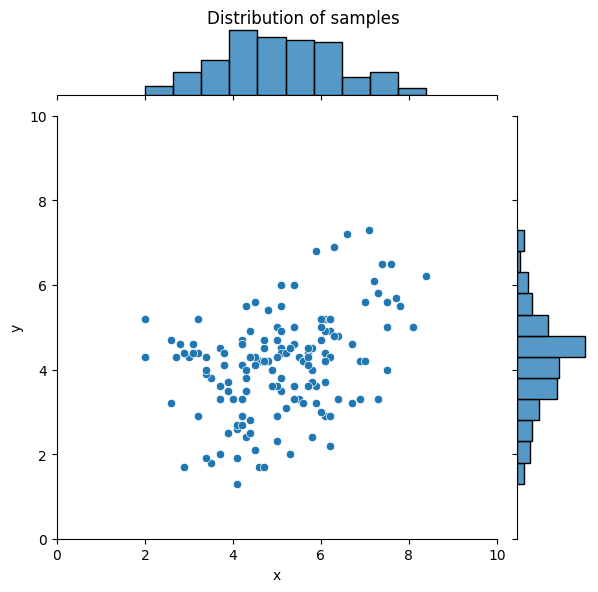

In [20]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open("/home/luis/Documents/FGV/eclass/final-project-security-urban-perception-tracking/static/data_hololens.json") as f:
    data = json.load(f)

x = []
y = []
for i in range(len(data)):
    line = data[str(i)]
    x.append(line['avg_hololens'])
    y.append(line['avg_pp2'])

data_points = pd.DataFrame({
    "x": x,
    "y": y
})

sns_fig = sns.jointplot(data=data_points, x="x", y="y")

sns_fig.fig.suptitle("Distribution of samples")

sns_fig.fig.tight_layout()
sns_fig.fig.subplots_adjust(top=0.95)

sns_fig.ax_marg_x.set_xlim(0, 10)
sns_fig.ax_marg_y.set_ylim(0, 10)

plt.show()